## 1. Шаг 1. Обзор данных

In [262]:
# импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('athlete_events.csv')

In [182]:
df.head() # выводим на просмотр первые 5 строк таблицы

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [184]:
plt.style.available # Для установки стиля для графиков
plt.style.use("Solarize_Light2")

In [20]:
df.info()    # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Описание данных

Итак, в таблице пятнадцать столбцов. Тип данных во всех столбцах — object, float и int.

* `ID` —  ID игрока;
* `Name` — ФИО игрока;
* `Sex` — гендер игрока;
* `Age` — возраст игрока;
* `Height` — рост игрока;
* `Weight` — вес игрока;
* `Team` — команда игрока;
* `NOC` — команда, которая мониторит;
* `Games` — год игры и время года сезона;
* `Year` — год;
* `Season` — время года сезона;
* `City` — город;
* `Sport` — спорт котором занимается игрок;
* `Event` — название эвента;
* `Medal` — какую медаль получил;
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

In [320]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [322]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [324]:
df.describe(include=[object])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


**Выводы**

В каждой строке таблицы — данные о игроке. Предварительно можно утверждать, что информации достаточно для пответов на вопросы.

Но встречаются пропуски в данных, возможны дубликаты, и, возможны анамальные значения, интересно что вес игрока 214.

Приступаем к предобработке данных.

## Шаг 2. Предобработка данных

Удалим дубликаты, исключим пропуски, удалим не нужную колонку в которой повторяются данные.

### Удаление дубликатов

Проверим датафрейм на наличие явных дубликатов и избавимся от них.

In [326]:
df.duplicated().sum()

1385

In [328]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)

df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()    # проверка

0

Проведем работу с текстом в столбцах если это потребуется: для этого выведем каждый столбец и визуально оценим его значения на уникальность.
Не исключено, что придется вносить изменения, если ошибки критичны и могут повлиять на результат исследования.

In [57]:
df['Sex'].value_counts()     # просмотр уникальных значений

Sex
M    195353
F     74378
Name: count, dtype: int64

In [63]:
df['Team'].value_counts()     # просмотр уникальных значений

Team
United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
                 ...  
Souriceau-38         1
Carabinier-5         1
Ducky-4              1
Ducky-16             1
Digby                1
Name: count, Length: 1184, dtype: int64

In [65]:
df['NOC'].value_counts()     # просмотр уникальных значений

NOC
USA    18604
FRA    12551
GBR    12115
ITA    10668
GER     9734
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: count, Length: 230, dtype: int64

In [67]:
df['Season'].value_counts()     # просмотр уникальных значений

Season
Summer    221167
Winter     48564
Name: count, dtype: int64

In [69]:
df['City'].value_counts()     # просмотр уникальных значений

City
London                    22297
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Seoul                     12037
Los Angeles               11919
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7008
Berlin                     6251
Sochi                      4891
Melbourne                  4829
Amsterdam                  4656
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sar

In [71]:
df['Sport'].value_counts()     # просмотр уникальных значений

Sport
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10827
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: count, Length: 66, dtype: int64

In [73]:
df['Event'].value_counts()     # просмотр уникальных значений

Event
Football Men's Football                                5733
Ice Hockey Men's Ice Hockey                            4762
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
                                                       ... 
Archery Men's Target Archery, 33 metres, Individual       2
Archery Men's Target Archery, 50 metres, Individual       2
Sailing Mixed 18 foot                                     2
Croquet Mixed Doubles                                     2
Aeronautics Mixed Aeronautics                             1
Name: count, Length: 765, dtype: int64

In [76]:
df['Medal'].value_counts()     # просмотр уникальных значений

Medal
Gold      13369
Bronze    13295
Silver    13108
Name: count, dtype: int64

### 2.1 Проверка данных на аномалии и исправления

Проверим вес игроков: есть ли лица, вес которых больше 150?
Если доля таких строк мала, то удалим их.

In [330]:
df[df['Weight'] > 150]['Weight'].count()

70

In [332]:
df.shape[0] 

269731

Доля ничтожна мала, удаляем такие строки:

In [334]:
df = df.loc[df['Weight'] < 150]

К остальным данным вопросов нет, проверим на пропущенные значения

In [336]:
# Проверка на пропущенные значения
df.isna().sum()

ID             0
Name           0
Sex            0
Age          862
Height      1363
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     177679
dtype: int64

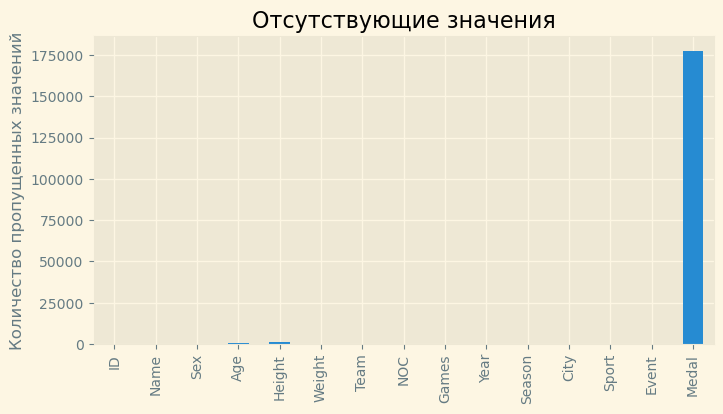

In [338]:
# Подсчет пропущенных значений в каждом столбце
missing_data = df.isna().sum()

# Построение гистограммы пропущенных значений
missing_data.plot(kind='bar', figsize=(8, 4))
plt.title("Отсутствующие значения")
plt.ylabel("Количество пропущенных значений")
plt.show()

In [340]:
med_Height = df['Height'].median()    # расчет медианы
med_Height

175.0

In [342]:
med_Age = df['Age'].median()    # расчет медианы
med_Age

24.0

Пустые значения столбца Height заполняем медианным значением роста (med_Height).

In [344]:
df['Height'] = df['Height'].fillna(med_Height)

C:\Users\Safjay\AppData\Local\Temp\ipykernel_10352\2705405337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].fillna(med_Height)


Пустые значения столбца Age заполняем медианным значением роста (med_Age).

In [346]:
df['Age'] = df['Age'].fillna(med_Age)

C:\Users\Safjay\AppData\Local\Temp\ipykernel_10352\1839555925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(med_Age)


In [348]:
df['Medal'] = df['Medal'].fillna(value=df['Medal'].mode()[0])

C:\Users\Safjay\AppData\Local\Temp\ipykernel_10352\2741669309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Medal'] = df['Medal'].fillna(value=df['Medal'].mode()[0])


In [350]:
df.isna().sum() # проверка

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [352]:
# Удаляем столбец в котором повторяеются уже имеющиеся данные
df.drop('Games', inplace=True, axis=1) 

C:\Users\Safjay\AppData\Local\Temp\ipykernel_10352\416697932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Games', inplace=True, axis=1)


In [354]:
df.head() # Просматриваем данные

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Gold
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",Gold
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,Gold


## Выводы

Предобработка обнаружила три проблемы в данных:

анамалии в данных,

пропущенные значения,

дубликаты — явные и неявные.
    
Пропущенные значения в количественных данных мы заменили на медианное.

### 2.2 Разведочный анализ данных

### Плотность распределения данных

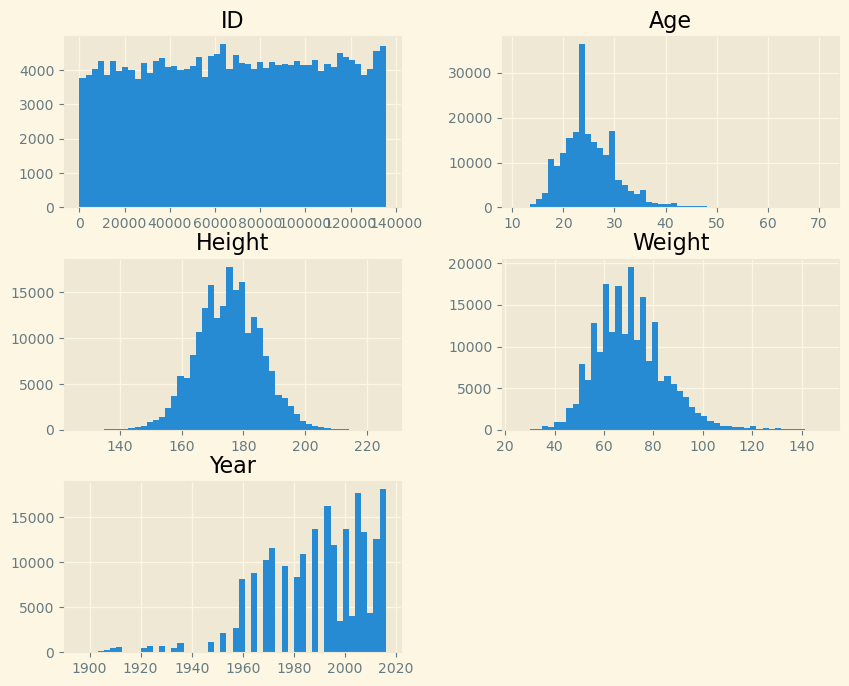

In [356]:
df.hist(figsize=(10, 8),  bins=50);

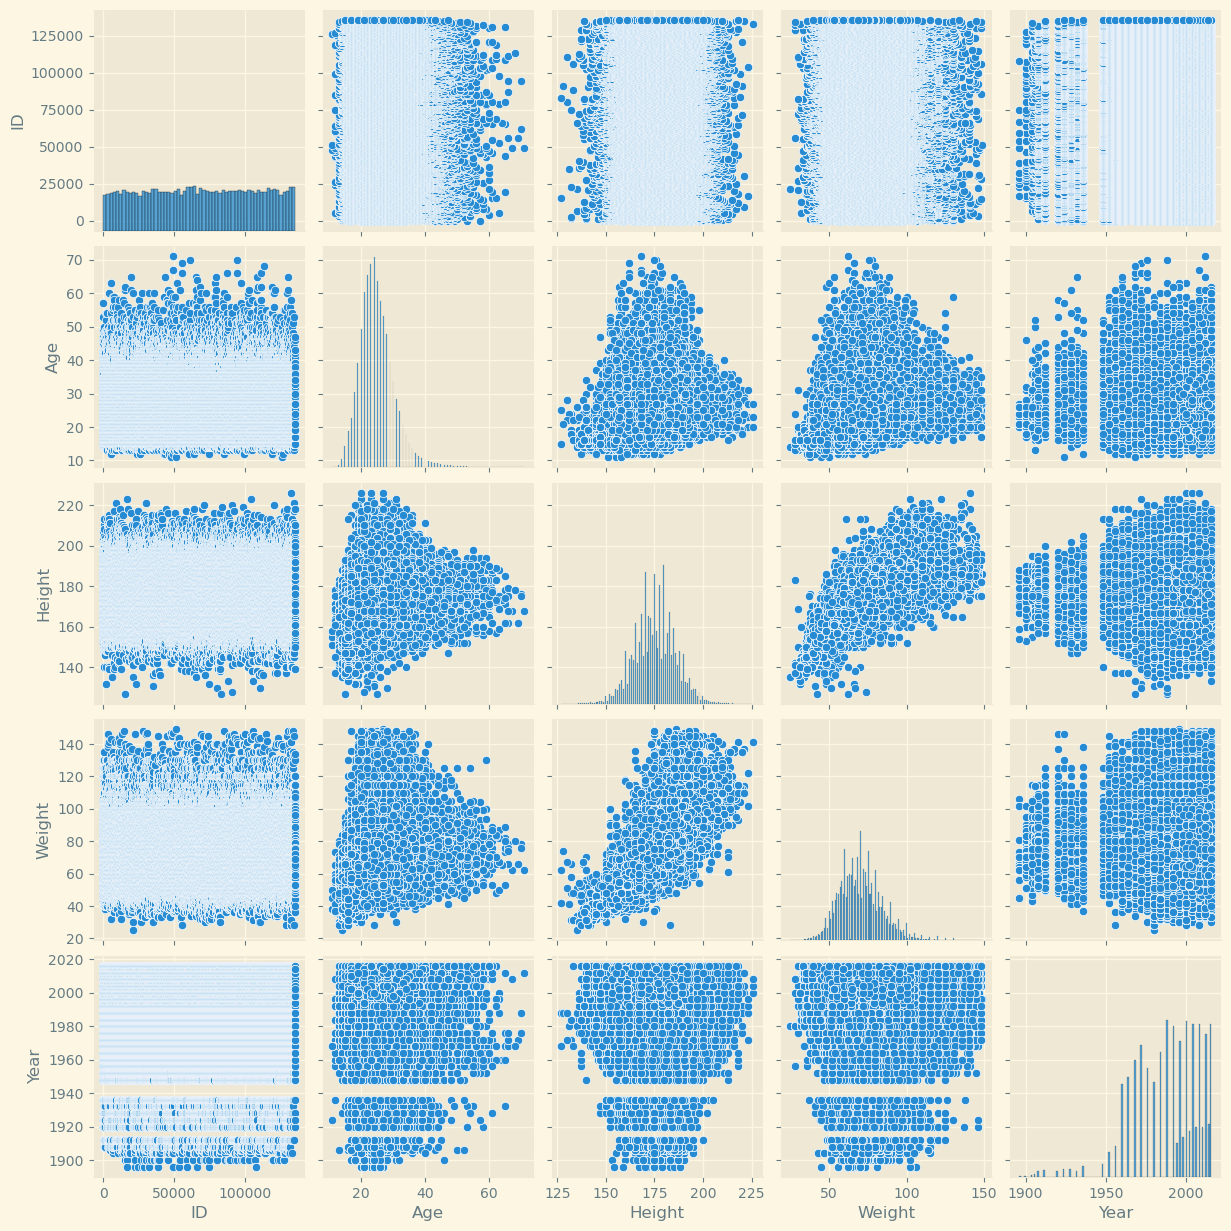

In [302]:
sns.pairplot(df);

In [303]:
map = df[['Year', 'Weight', 'Height', 'Age', 'ID']].corr()

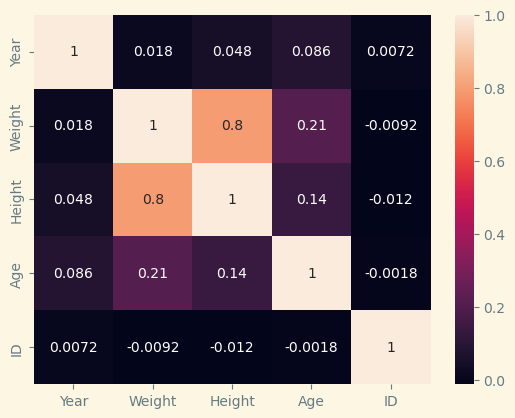

In [304]:
sns.heatmap(df[['Year', 'Weight', 'Height', 'Age', 'ID']].corr(), annot=True);

## Выводы

Обнаружены некоторые зависимости: Например между ростом и весом, уже не так значительно видно зависимость между весом и возрастом и ростом и возрастом.